<a href="https://colab.research.google.com/github/hBar2013/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Kim_Lowry_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [1]:
# TODO
from google.colab import files
uploaded = files.upload()

Saving haberman.data to haberman.data


In [0]:
import pandas as pd
df = pd.read_csv('haberman.data', header=None)

In [0]:
#Add Column Descriptions
df.columns=('Age', 'Operation_Year', 'Num_Nodes', 'Survival_Ind')

In [28]:
#Check Row Numbers - Should have 306 instances
df.shape

(306, 4)

In [29]:
#Check for NaNs
df.isna().sum()

Age               0
Operation_Year    0
Num_Nodes         0
Survival_Ind      0
dtype: int64

In [0]:
#Replace survival indicator column value of 2 with 1
df['Survival_Ind'] = df['Survival_Ind'].replace(2, 0)

In [31]:
df.head()

,Age,Operation_Year,Num_Nodes,Survival_Ind
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [32]:
# Basic describe first
df.describe()

,Age,Operation_Year,Num_Nodes,Survival_Ind
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [43]:
#Crosstab number of nodes and survival
ct = pd.crosstab(df['Survival_Ind'], df['Num_Nodes'], normalize='columns')
ct

Num_Nodes,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,28,30,35,46,52
Survival_Ind,,,,,,,,,,,,,,,,,,,,,
0,0.139706,0.195122,0.25,0.35,0.230769,0.666667,0.428571,0.285714,0.285714,0.666667,...,1.0,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.860294,0.804878,0.75,0.65,0.769231,0.333333,0.571429,0.714286,0.714286,0.333333,...,0.0,0.666667,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


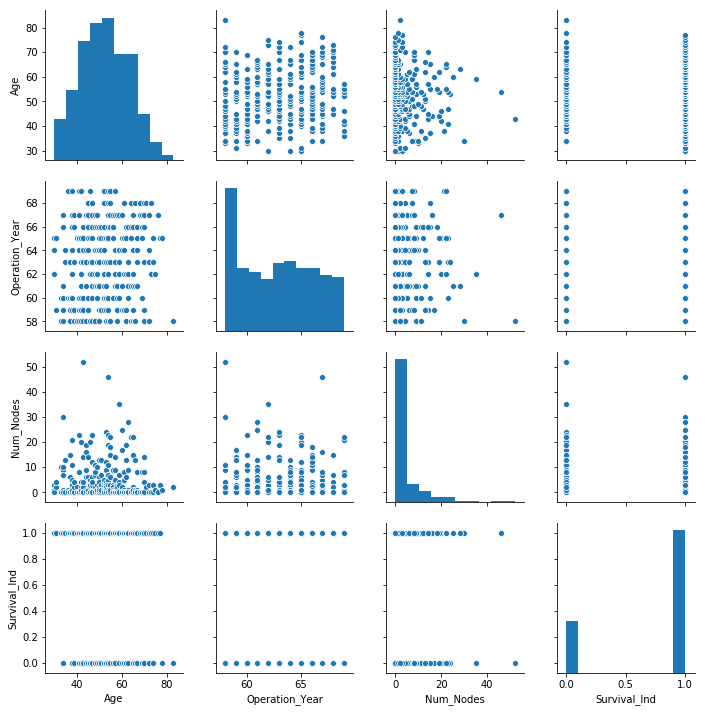

In [21]:
import seaborn as sns
sns.pairplot(df);

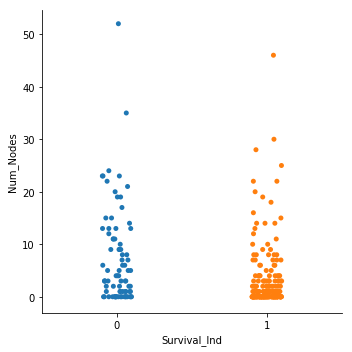

In [47]:
sns.catplot(x='Survival_Ind', y='Num_Nodes',data=df);

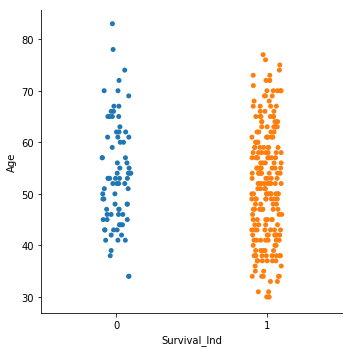

In [49]:
sns.catplot(x='Survival_Ind', y='Age',data=df);

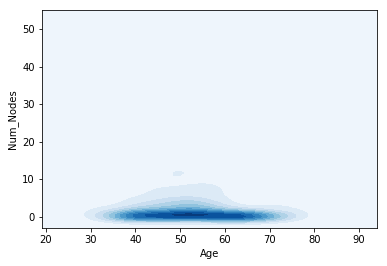

In [48]:
sns.kdeplot(df['Age'], df['Num_Nodes'], cmap="Blues", shade=True, shade_lowest=True, );

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

As the number of nodes increases the survival rate decreases. 

Age also impacts survival with the younger the age the more likely the patient survived beyond 5 years.

I saw no indication of a strong relationship between age and number of nodes.

I do believe that age may be a confounding feature as we can't really say from this data what the cause of death was. 